In [1]:
import pandas as pd
import sqlite3
connTeams = sqlite3.connect("teams.sqlite")

sqlSelectTables = "SELECT name FROM sqlite_master WHERE type='table';"

tables_teams = pd.read_sql(sqlSelectTables, connTeams)

tables_teams

,name
0,teams_2021-22-2-5
1,teams_2021-22-12-31
2,teams_2021-22-12-9
3,teams_2021-22-1-17
4,teams_2021-22-11-22
...,...
4242,teams_2007-08-11-22
4243,teams_2007-08-11-23
4244,teams_2007-08-11-24
4245,teams_2007-08-11-25


In [5]:
# Read the table into a pandas DataFrame
table_name = "teams_2021-22-12-31"
escaped_table_name = f'"{table_name}"'  # Escape table name with double quotes
df_teams = pd.read_sql("SELECT * FROM " + escaped_table_name, connTeams)
df_teams.columns

# # Read the table into a pandas DataFrame
# table_name = "teams_2007-08-11-26"
# escaped_table_name = f'"{table_name}"'  # Escape table name with double quotes
# df_teams = pd.read_sql("SELECT * FROM " + escaped_table_name, connTeams)
# df_teams

Index(['index', 'Unnamed: 0', 'TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'CFID', 'CFPARAMS', 'Date'],
      dtype='object')

In [6]:
# Remove unnecessary columns
df_teams = df_teams.drop(columns=['index', 'Unnamed: 0', 'CFID', 'CFPARAMS'])

# Convert Date column to datetime
df_teams['Date'] = pd.to_datetime(df_teams['Date'])

# Set Date as the index for easier time series analysis
df_teams.set_index('Date', inplace=True)

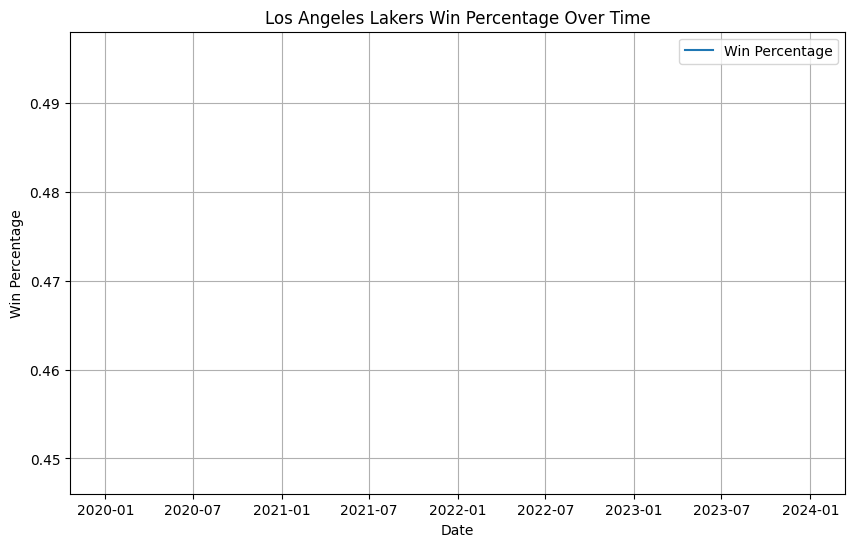

In [7]:
import matplotlib.pyplot as plt
print df_teams['EA
# Filter by a specific team or visualize all teams
team_name = "Los Angeles Lakers"
df_team = df_teams[df_teams['TEAM_NAME'] == team_name]

plt.figure(figsize=(10,6))
plt.plot(df_team.index, df_team['W_PCT'], label='Win Percentage')
plt.title(f'{team_name} Win Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Win Percentage')
plt.legend()
plt.grid(True)
plt.show()